# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Loading and examining the dataset
penguins_df = pd.read_csv("../data/raw/penguins.csv")

In [2]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [3]:
penguins_clean = penguins_df.dropna()
penguins_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


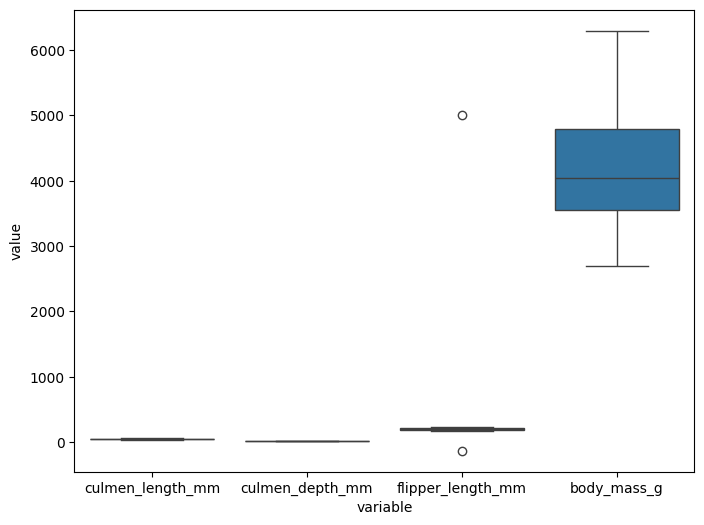

In [5]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x="variable", y="value", data=pd.melt(penguins_clean.drop('sex',axis=1)))

plt.show()
#From the boxplot below, only column with outliers is flipper_length_mm

In [6]:
## Using Boxplot (IQR method)
Q1 = penguins_clean['flipper_length_mm'].quantile(0.25)
Q3 = penguins_clean['flipper_length_mm'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = penguins_clean[(penguins_clean['flipper_length_mm'] < lower_bound) | (penguins_clean['flipper_length_mm'] > upper_bound)]
penguins_clean = penguins_clean[(penguins_clean['flipper_length_mm'] >= lower_bound) & (penguins_clean['flipper_length_mm'] <= upper_bound)]

In [7]:
print(outliers_iqr)
print(penguins_clean.head())

    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9               42.0             20.2             5000.0       4250.0  MALE
14              34.6             21.1             -132.0       4400.0  MALE
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
4              36.7             19.3              193.0       3450.0  FEMALE
5              39.3             20.6              190.0       3650.0    MALE


In [8]:
'''
numeric_features = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = ["sex"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)'''

'\nnumeric_features = [\'culmen_length_mm\',\'culmen_depth_mm\',\'flipper_length_mm\',\'body_mass_g\']\nnumeric_transformer = Pipeline(\n    steps=[("scaler", StandardScaler())]\n)\n\ncategorical_features = ["sex"]\ncategorical_transformer = Pipeline(\n    steps=[\n        ("encoder", OneHotEncoder(handle_unknown="ignore"))\n    ]\n)\npreprocessor = ColumnTransformer(\n    transformers=[\n        ("num", numeric_transformer, numeric_features),\n        ("cat", categorical_transformer, categorical_features),\n    ]\n)'

In [9]:
penguins_preprocessed = pd.get_dummies(penguins_clean,drop_first=True)

In [10]:
scaler = StandardScaler()
penguins_preprocessed = pd.DataFrame(scaler.fit_transform(penguins_preprocessed),columns = penguins_preprocessed.columns)

In [11]:
print(penguins_preprocessed)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0           -0.905520         0.793126          -1.428125    -0.569709   
1           -0.831938         0.128503          -1.071522    -0.507579   
2           -0.684775         0.435252          -0.429637    -1.191006   
3           -1.347011         1.099875          -0.572278    -0.942487   
4           -0.868729         1.764498          -0.786240    -0.693968   
..                ...              ...                ...          ...   
328          0.584511        -1.763116           0.925454     0.890339   
329          0.510929        -1.456367           0.996775     0.797145   
330          1.173166        -0.740619           1.496019     1.915480   
331          0.216602        -1.200743           0.782813     1.232053   
332          1.081188        -0.536120           0.854134     1.480572   

     sex_FEMALE  sex_MALE  
0     -0.991031  0.997001  
1      1.009050 -1.003008  
2      1.009050 -1.003008  

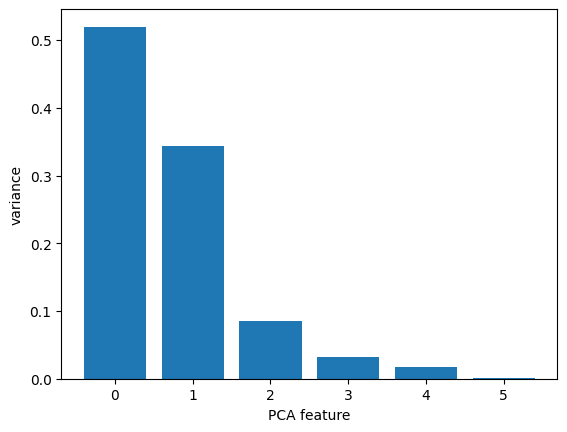

In [12]:
pca = PCA()
pca.fit(penguins_preprocessed)

features = range(pca.n_components_)

plt.bar(features,pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [13]:
print(pca.explained_variance_ratio_)

[0.51973484 0.34424041 0.08591863 0.03225427 0.01686049 0.00099136]


In [14]:
n_components = 2
pca = PCA(n_components)
pca.fit(penguins_preprocessed)
penguins_PCA = pca.transform(penguins_preprocessed)

In [15]:
print(penguins_PCA)

[[-7.29520694e-01 -2.09719199e+00]
 [-1.92930440e+00  4.12149703e-01]
 [-1.95352479e+00  3.08485398e-01]
 [-2.28817761e+00 -1.58277726e-01]
 [-6.21821649e-01 -2.51402049e+00]
 [-2.29152165e+00  1.26445549e-01]
 [ 2.70680676e-01 -1.85613349e+00]
 [-2.33416049e+00  1.50781067e-01]
 [-5.97023288e-01 -2.65728372e+00]
 [-2.29097852e+00  1.91722418e-01]
 [-2.03556313e+00  1.40926894e-02]
 [ 4.03586127e-01 -2.13984589e+00]
 [-2.78682640e+00 -1.42762052e-01]
 [ 3.26341981e-01 -2.46479526e+00]
 [-2.80192041e+00 -2.54639414e-01]
 [-9.70630285e-01 -2.17804104e+00]
 [-2.25960046e+00 -1.47648262e-01]
 [-4.89541085e-01 -1.79101648e+00]
 [-6.35131373e-01 -1.64334482e+00]
 [-2.35187589e+00 -1.08021864e-01]
 [-6.59573801e-01 -2.04230703e+00]
 [-2.23509243e+00  1.56193095e-01]
 [-3.04481322e+00 -4.48467094e-01]
 [-5.41400318e-01 -2.11124270e+00]
 [-2.49485913e+00  3.28554417e-01]
 [-8.40878499e-01 -1.97343654e+00]
 [-2.20946064e+00  2.15236998e-01]
 [-4.04061942e-01 -2.02813659e+00]
 [-2.13725350e+00  5

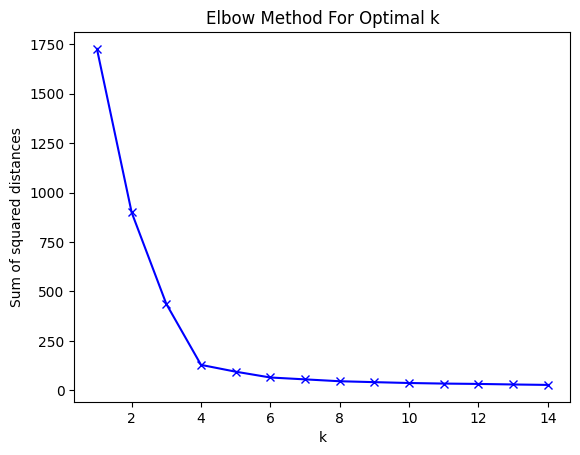

In [16]:
# Create empty list
sum_of_squared_distances = []

# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans = kmeans.fit(penguins_PCA)
    sum_of_squared_distances.append(kmeans.inertia_)
    
# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters,random_state=42)
kmeans.fit(penguins_PCA)

KMeans(n_clusters=4, random_state=42)

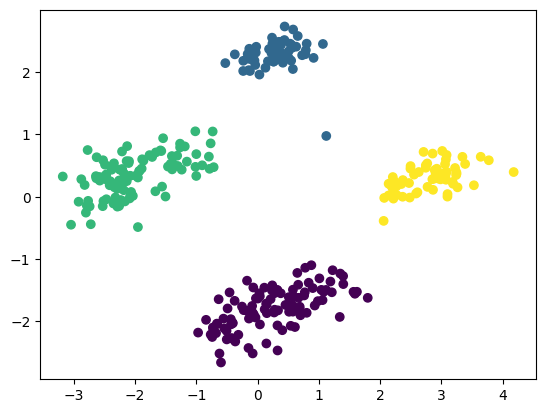

In [18]:
plt.scatter(penguins_PCA[:,0],penguins_PCA[:,1],c=kmeans.labels_)
plt.show()

In [19]:
penguins_clean['label'] = kmeans.labels_
print(penguins_clean)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

        sex  label  
0      MALE      0  
1    FEMALE      2  
2    FEMALE      2  
4    FEMALE      2  
5     

In [20]:
numeric_columns = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             43.878302        19.111321         194.764151  4006.603774
1             45.545763        14.262712         212.779661  4683.050847
2             40.217757        17.611215         189.046729  3419.158879
3             49.473770        15.718033         221.540984  5484.836066


In [ ]:
#storing processed dataframes

penguins_clean.to_csv('../data/processed/penguins_clean.csv')
penguins_preprocessed.to_csv('../data/processed/penguins_preprocessed.csv')
pd.DataFrame(penguins_PCA).to_csv('../data/processed/penguins_PCA.csv')


In [21]:
#storing model
pickle.dump(kmeans,open('../models/K-Means_Clustering.pickle','wb'))